# 축소 정복 : 주어진 문제를 하나의 좀 더 작은 문제로 축소하여 해결 
### 주어진 문제와 더 작은 문제간의 관계를 이용하는 전략
예: n! = n+(n-1)! : (n-1)!을 먼저 구하고 여기에 n을 곱한다  
분할 정복 기법의 일종  
적용 방법  
하향식(top-down): 순환구조  
상향식(bottom-up: 반복구조  

In [4]:
def  factorial_recur(n) :   # 축소 정복기법;하향식접근
    if n == 1 :       
        return 1  
    else :
        return (n * factorial_recur(n - 1))     # 자기 자신을 순환적으로 호출. 
def factorial_iter(n) :          # # 축소 정복기법;상향식접근
    result = 1
    for k in range(1, n+1) :  # k:  1, 2, ..., n-1, n
        result = result * k    # 기본 연산
    return result
 

    
print('Factorial순환(3) = ', factorial_recur(3))
print('Factorial반복(3) = ', factorial_iter(3))

Factorial순환(3) =  6
Factorial반복(3) =  6


### 축소정복 기법은 문제의 크기가 줄어드는 방식에 따라 3가지로
고정 크기 축소 : 순환 ,반복에 따라 문제의 크기가 일정한 수 만큼 줄어드는 경우  
예 : 팩토리얼  
고정 비율 축소 : 문제의 크기가 일정한 비율로 줄어드는 경우, 많은 경우 1/2   
예 : 이진 탐색 , a^n(거듭제곱,짝수, 홀수)  
가변 크기 축소 : 때에 따라 문제의 크기가 가변적인 경우  
예 : 유클리드 알고리즘 (반복에 따라 줄어드는 크기가 일정하지 않음 X)
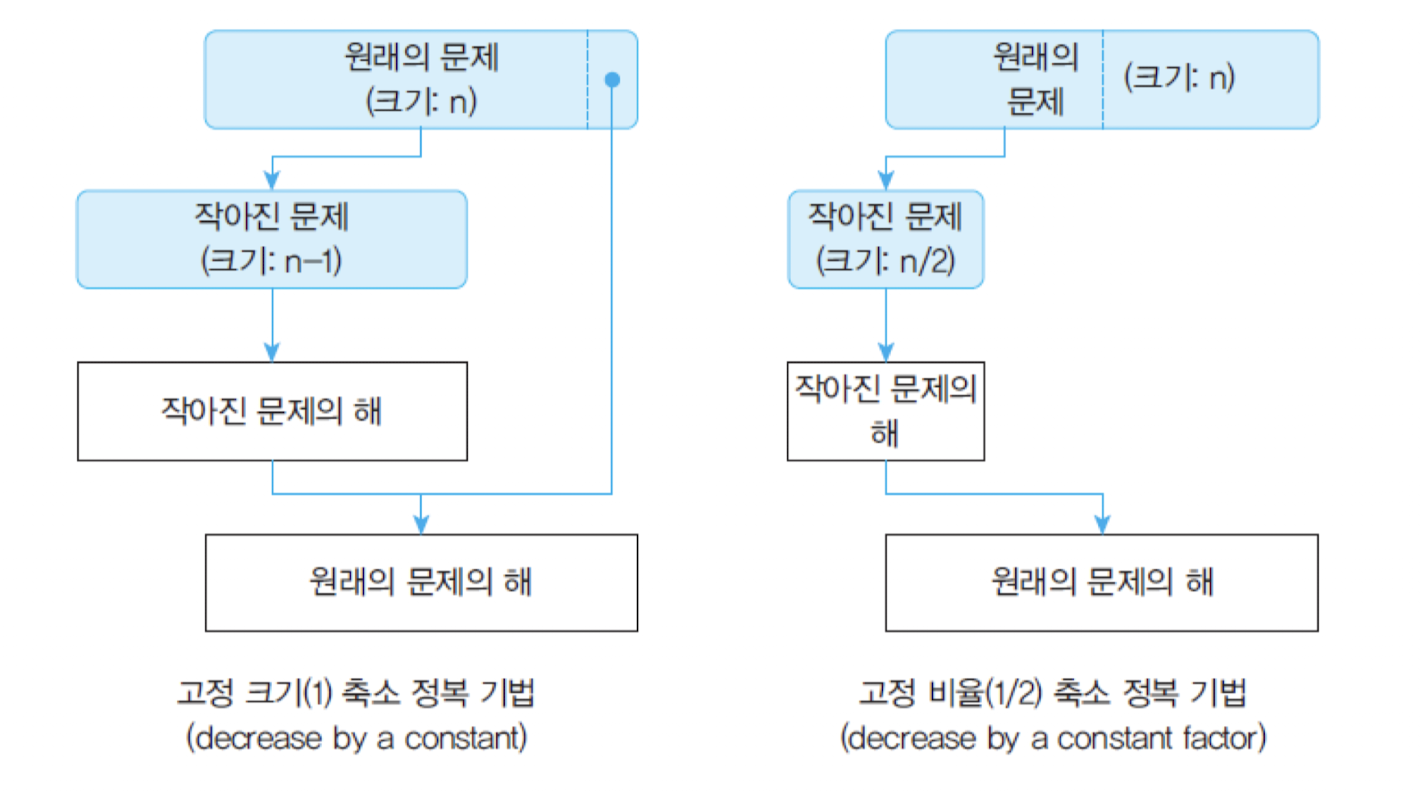

## 삽입정렬
리스트 n개의 항목, 이들을 key 순서에 따라 오름차순으로 재배치  
### 축소정복 기법으로 해결: n개의 항목리스트 A[0.. n-1]의 오름차순 정렬 , 더 작은 문제사이 관계를 찾는다.
- A[0..n-2]가 이미 정렬되어 있다고 가정
- 문제 해결을 위해 A[n-1]가 들어갈 적절한 위치를 A[0..n-2]에서 찾아 끼워 넣음  
정렬을 위한 축소 정복 전략
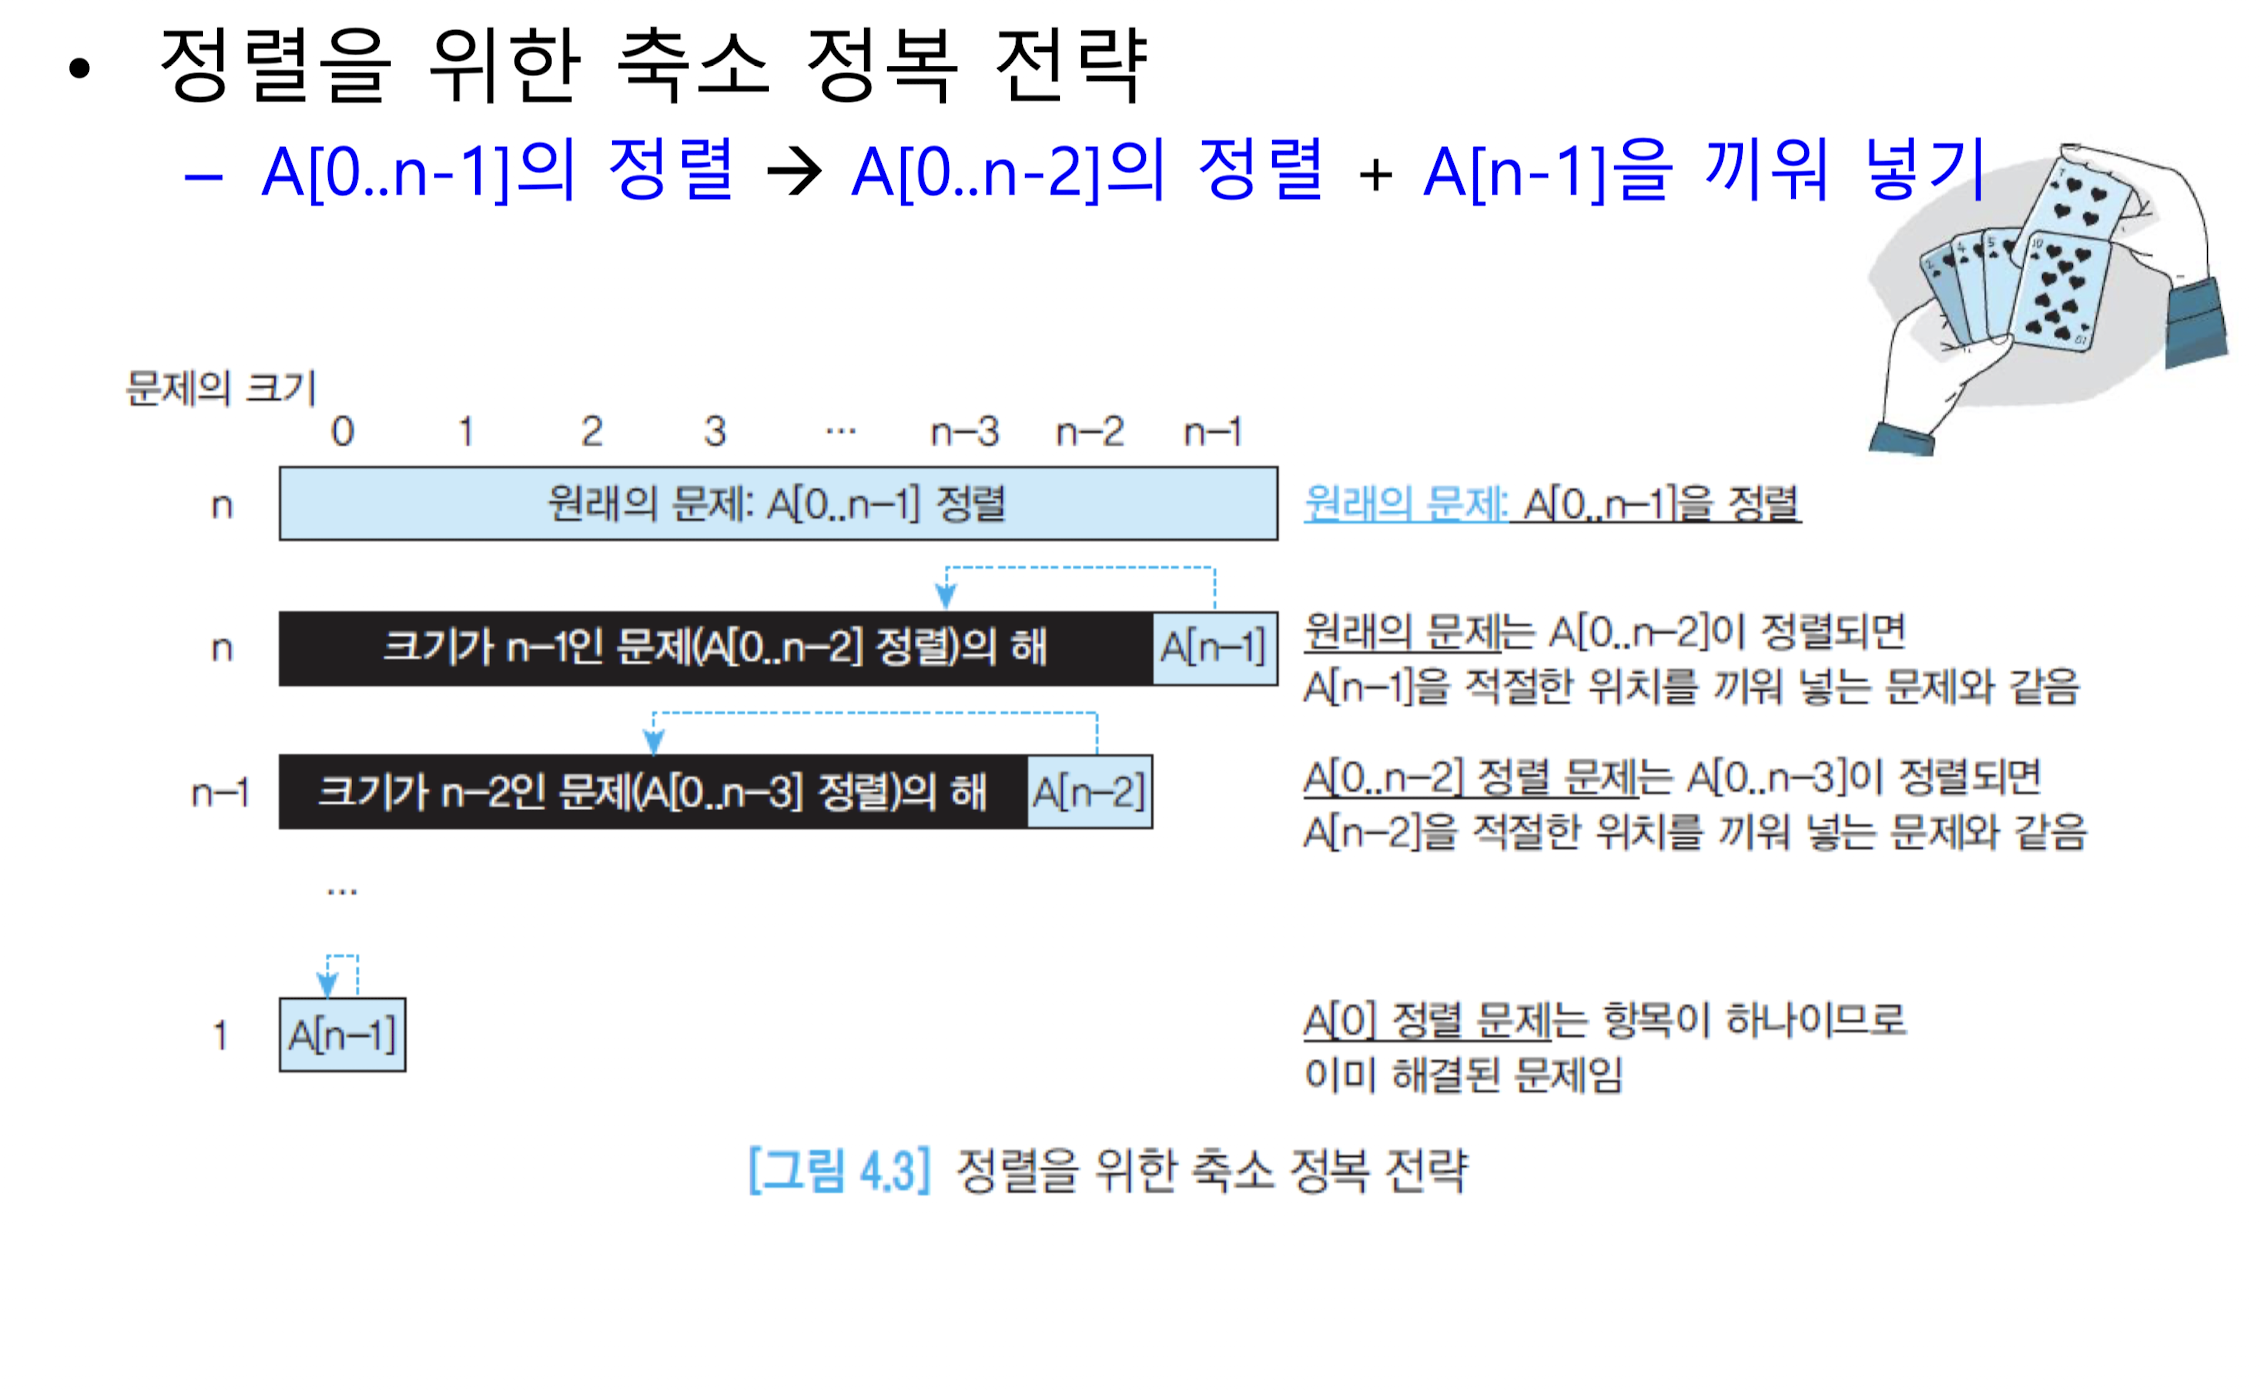

## 문제의 크기를 1씩 줄이는 전형적인 "고정 크기 축소", 순환 구조 이용하면 쉽게 기술

## 축소정복 기법으로 해결 : n 개의 항목리스트 A[0..n-1]의 오름차순 정렬, 더 작은 문제사이 관계를 찾는다.

#### 문제의 크기를 1씩 줄이는 

- 카드정렬과 유사: 손안에 정렬된카드 존재, 카드를 추가로 한장씩 더 받을 때마다 그 카드를 순서대로 끼워 넣기

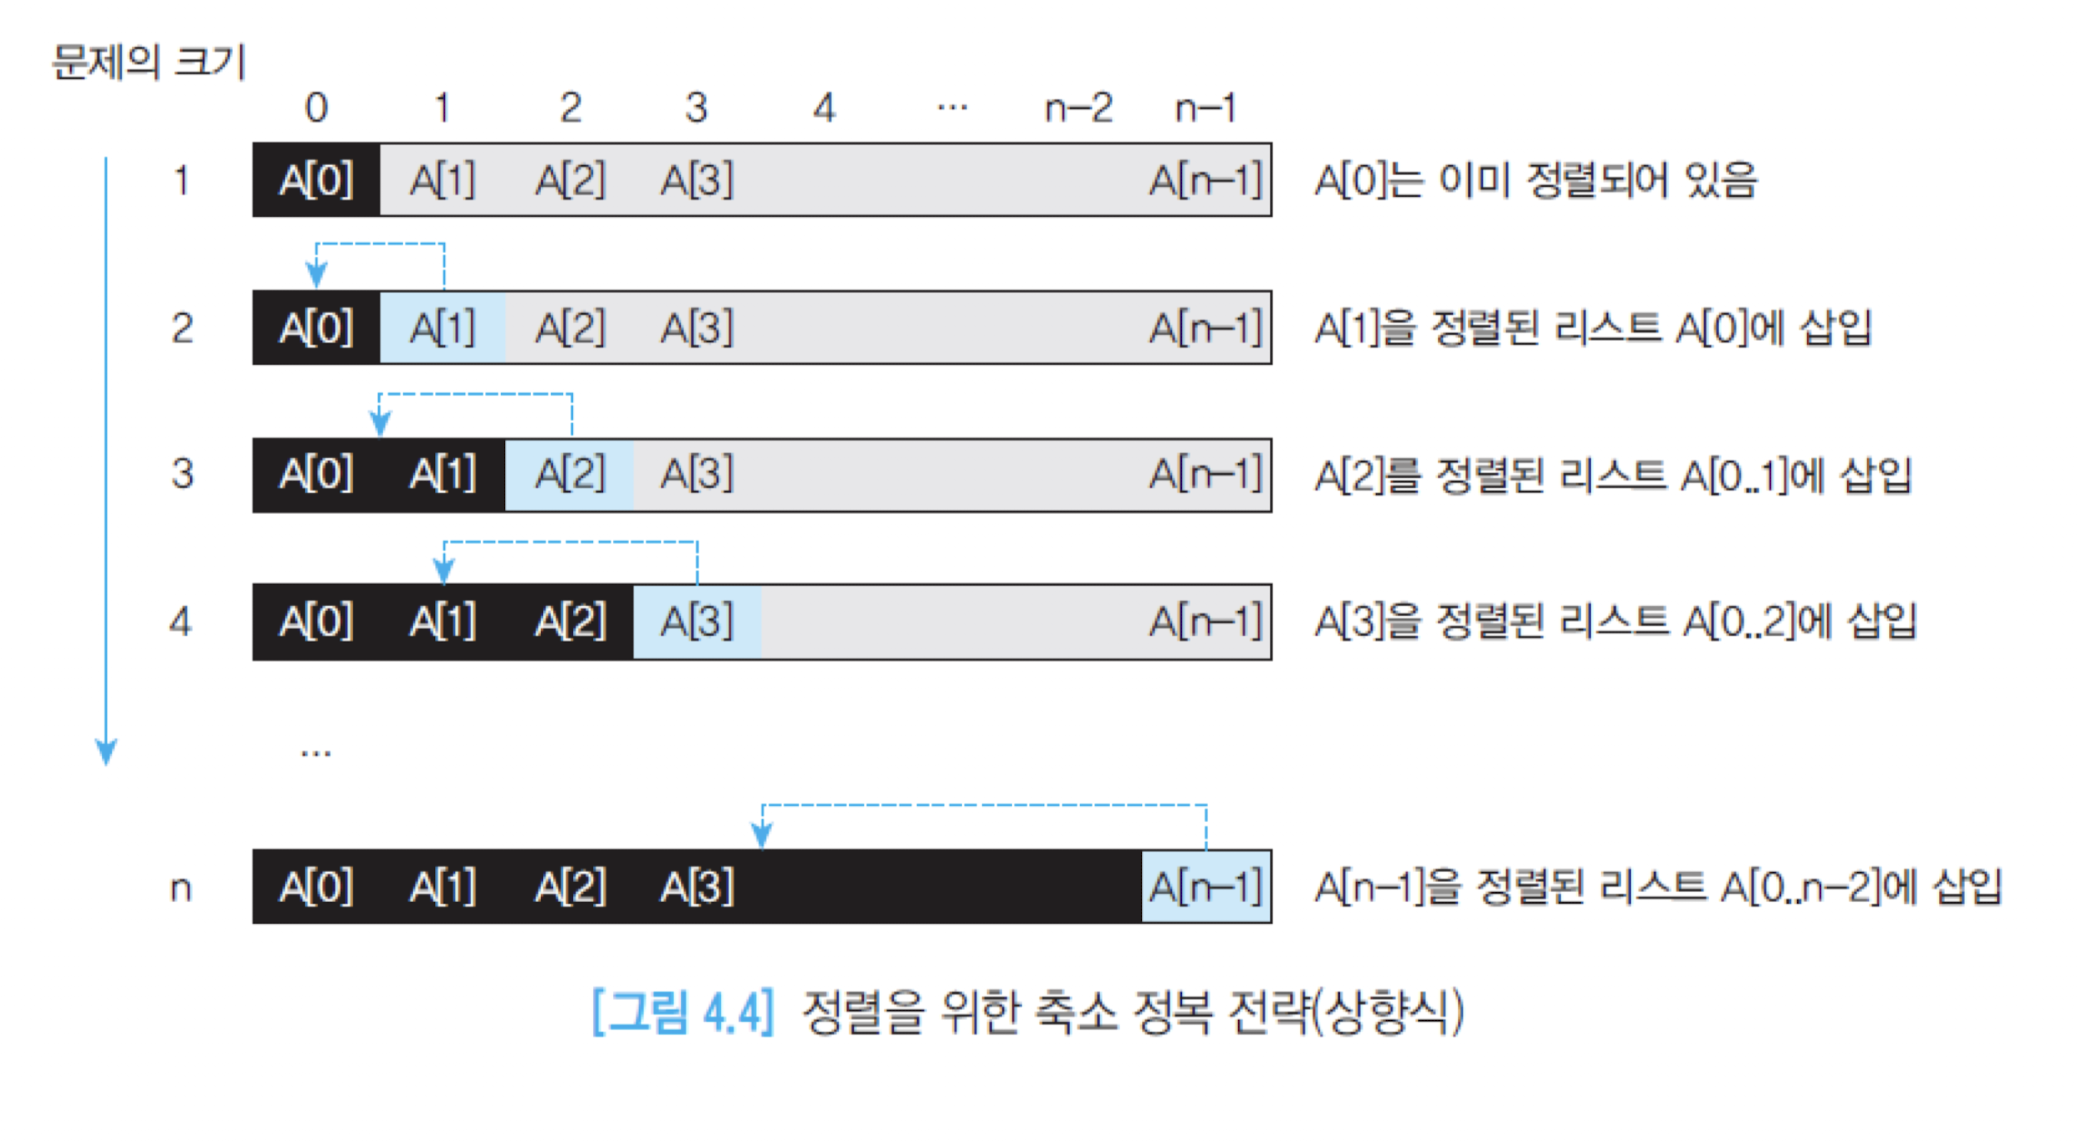

# 효율적인 끼워 넣기를 위한 삽입 위치 찾기
### 뒤에서 앞으로 넣을 위치를 찾아나감
### 문제점 : 항목을 미리 뒤로 옮길 수 있음 

이 과정은 정렬된 부분의 맨 뒤쪽부터 처리해야  
[3,5,8]이 정렬된 상태에서 4를 끼워넣기 위해 5와 8을 한칸씩 옮겨야 합니다.

### [3,5,8]이 정렬된 상태에서 4의 위치를 찾는 과정:
### 8을 먼저 비교하고 이 값이 4보다 크므로 8과 4를 교화, 그 다음으로 5를 비교 4보다 크므로 교환 
### 그 다음으로 3을 비교하면 4보다 작으므로 제자리를 찾는다.


## 실제 항목을 교환 할 필요 X ,앞의 항목을 뒤로 복사하기만 하면 됨
## 삽일할 항목을 A[i]를 찾는 위치에 복사하면 되기 때문
## 삽입할 항목A[i]를 다른 변수에 저장
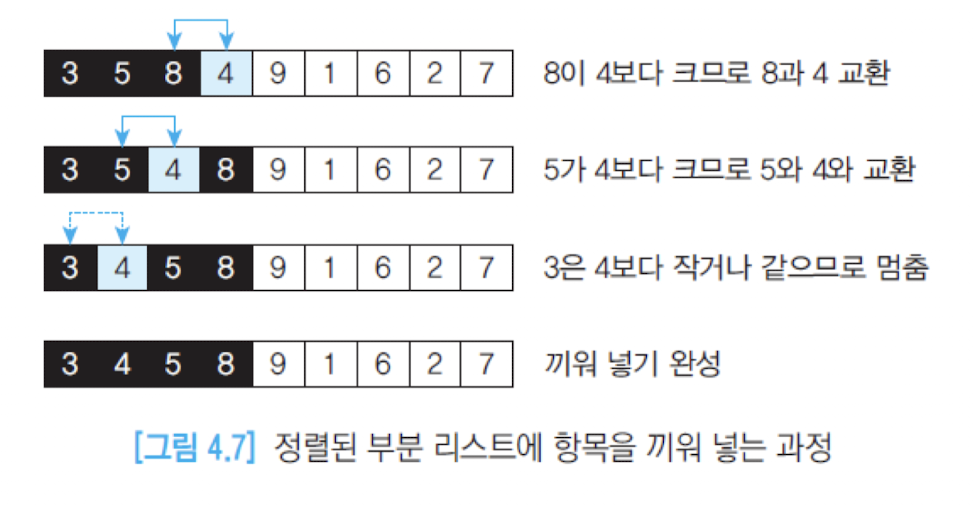

In [5]:
def insertion_sort(A) :

    n = len(A)   # 입력의 크기

    for i in range(1, n) :     # 외부 루프: 1, 2, ... n-1

        key = A[i]          # A[i]를 key에 저장

        j = i-1            # 항목 A[i-1]부터 검사

        while j>=0 and A[j] > key :       # 내부 루프

            A[j + 1] = A[j]           # 항목들을 오른쪽으로 한 칸씩 이동

            j = j - 1                   # 위치를 왼쪽으로 이동

        A[j + 1] = key                  # 항목 A[i]를 제 위치에 삽입

        printStep(A, i)

 

 

def printStep(arr, val) :           # 중간 과정 출력용 함수

    print("  Step %2d = " % val, end='')    # 현재 단계를 출력

    print(arr)        # 리스트의 내용을 출력

 

data = [ 5, 3, 8, 4, 9, 1, 6, 2, 7 ]

print("Original  :", data)

insertion_sort(data)

print("Insertion :", data)

Original  : [5, 3, 8, 4, 9, 1, 6, 2, 7]
  Step  1 = [3, 5, 8, 4, 9, 1, 6, 2, 7]
  Step  2 = [3, 5, 8, 4, 9, 1, 6, 2, 7]
  Step  3 = [3, 4, 5, 8, 9, 1, 6, 2, 7]
  Step  4 = [3, 4, 5, 8, 9, 1, 6, 2, 7]
  Step  5 = [1, 3, 4, 5, 8, 9, 6, 2, 7]
  Step  6 = [1, 3, 4, 5, 6, 8, 9, 2, 7]
  Step  7 = [1, 2, 3, 4, 5, 6, 8, 9, 7]
  Step  8 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
Insertion : [1, 2, 3, 4, 5, 6, 7, 8, 9]


## 복잡도 분석
입력의 크기: 입력 구성에 따른 차이가 있음
기본연산 : A[i] > key

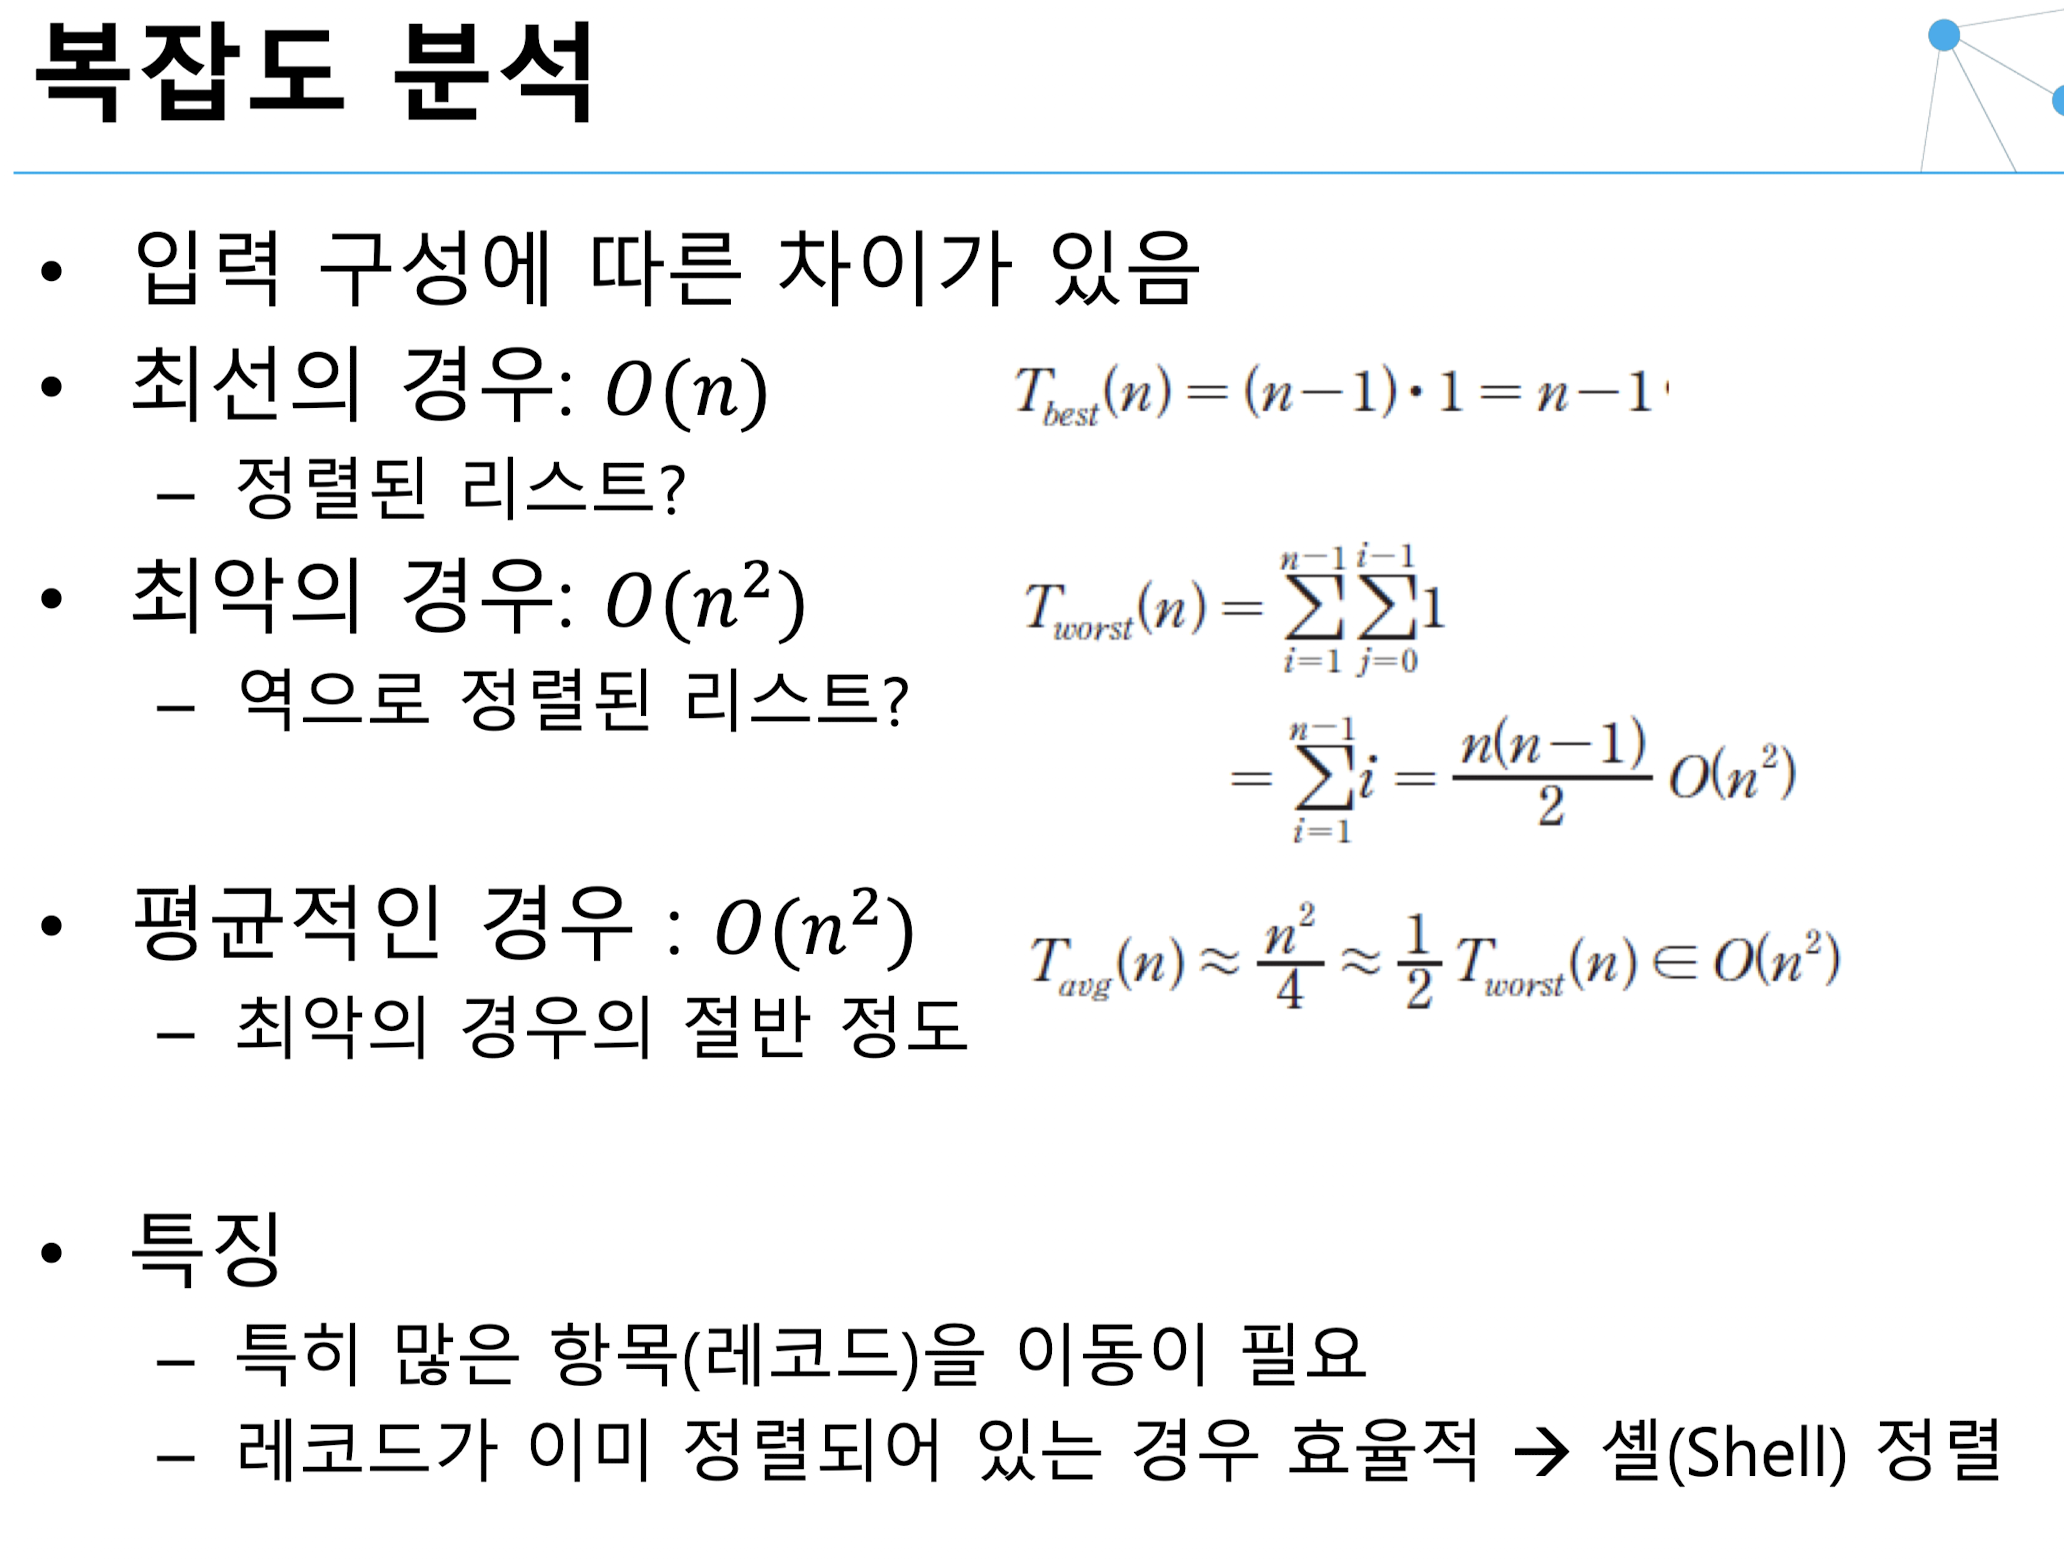

### Shell 정렬
정렬해야 할 리스트의 각 k번째 요소로를 추출해서 부분 리스트를 만든다. 이때 ,k 를 '간격' (gap)
### 간격의 초깃값: (정렬 할 값의 수)/2
생성된 부분 리스트의 개수는 gap과 같다  
각 회전마다 간격 k를 절반으로 줄인다.  
간격은 홀수로 하는 것이 좋다  
간격을 절반으로 줄일때 짝수가 나오면 +1을 해서 홀수로 만든다  
간격 k가 1일 될 때까지 반복한다.
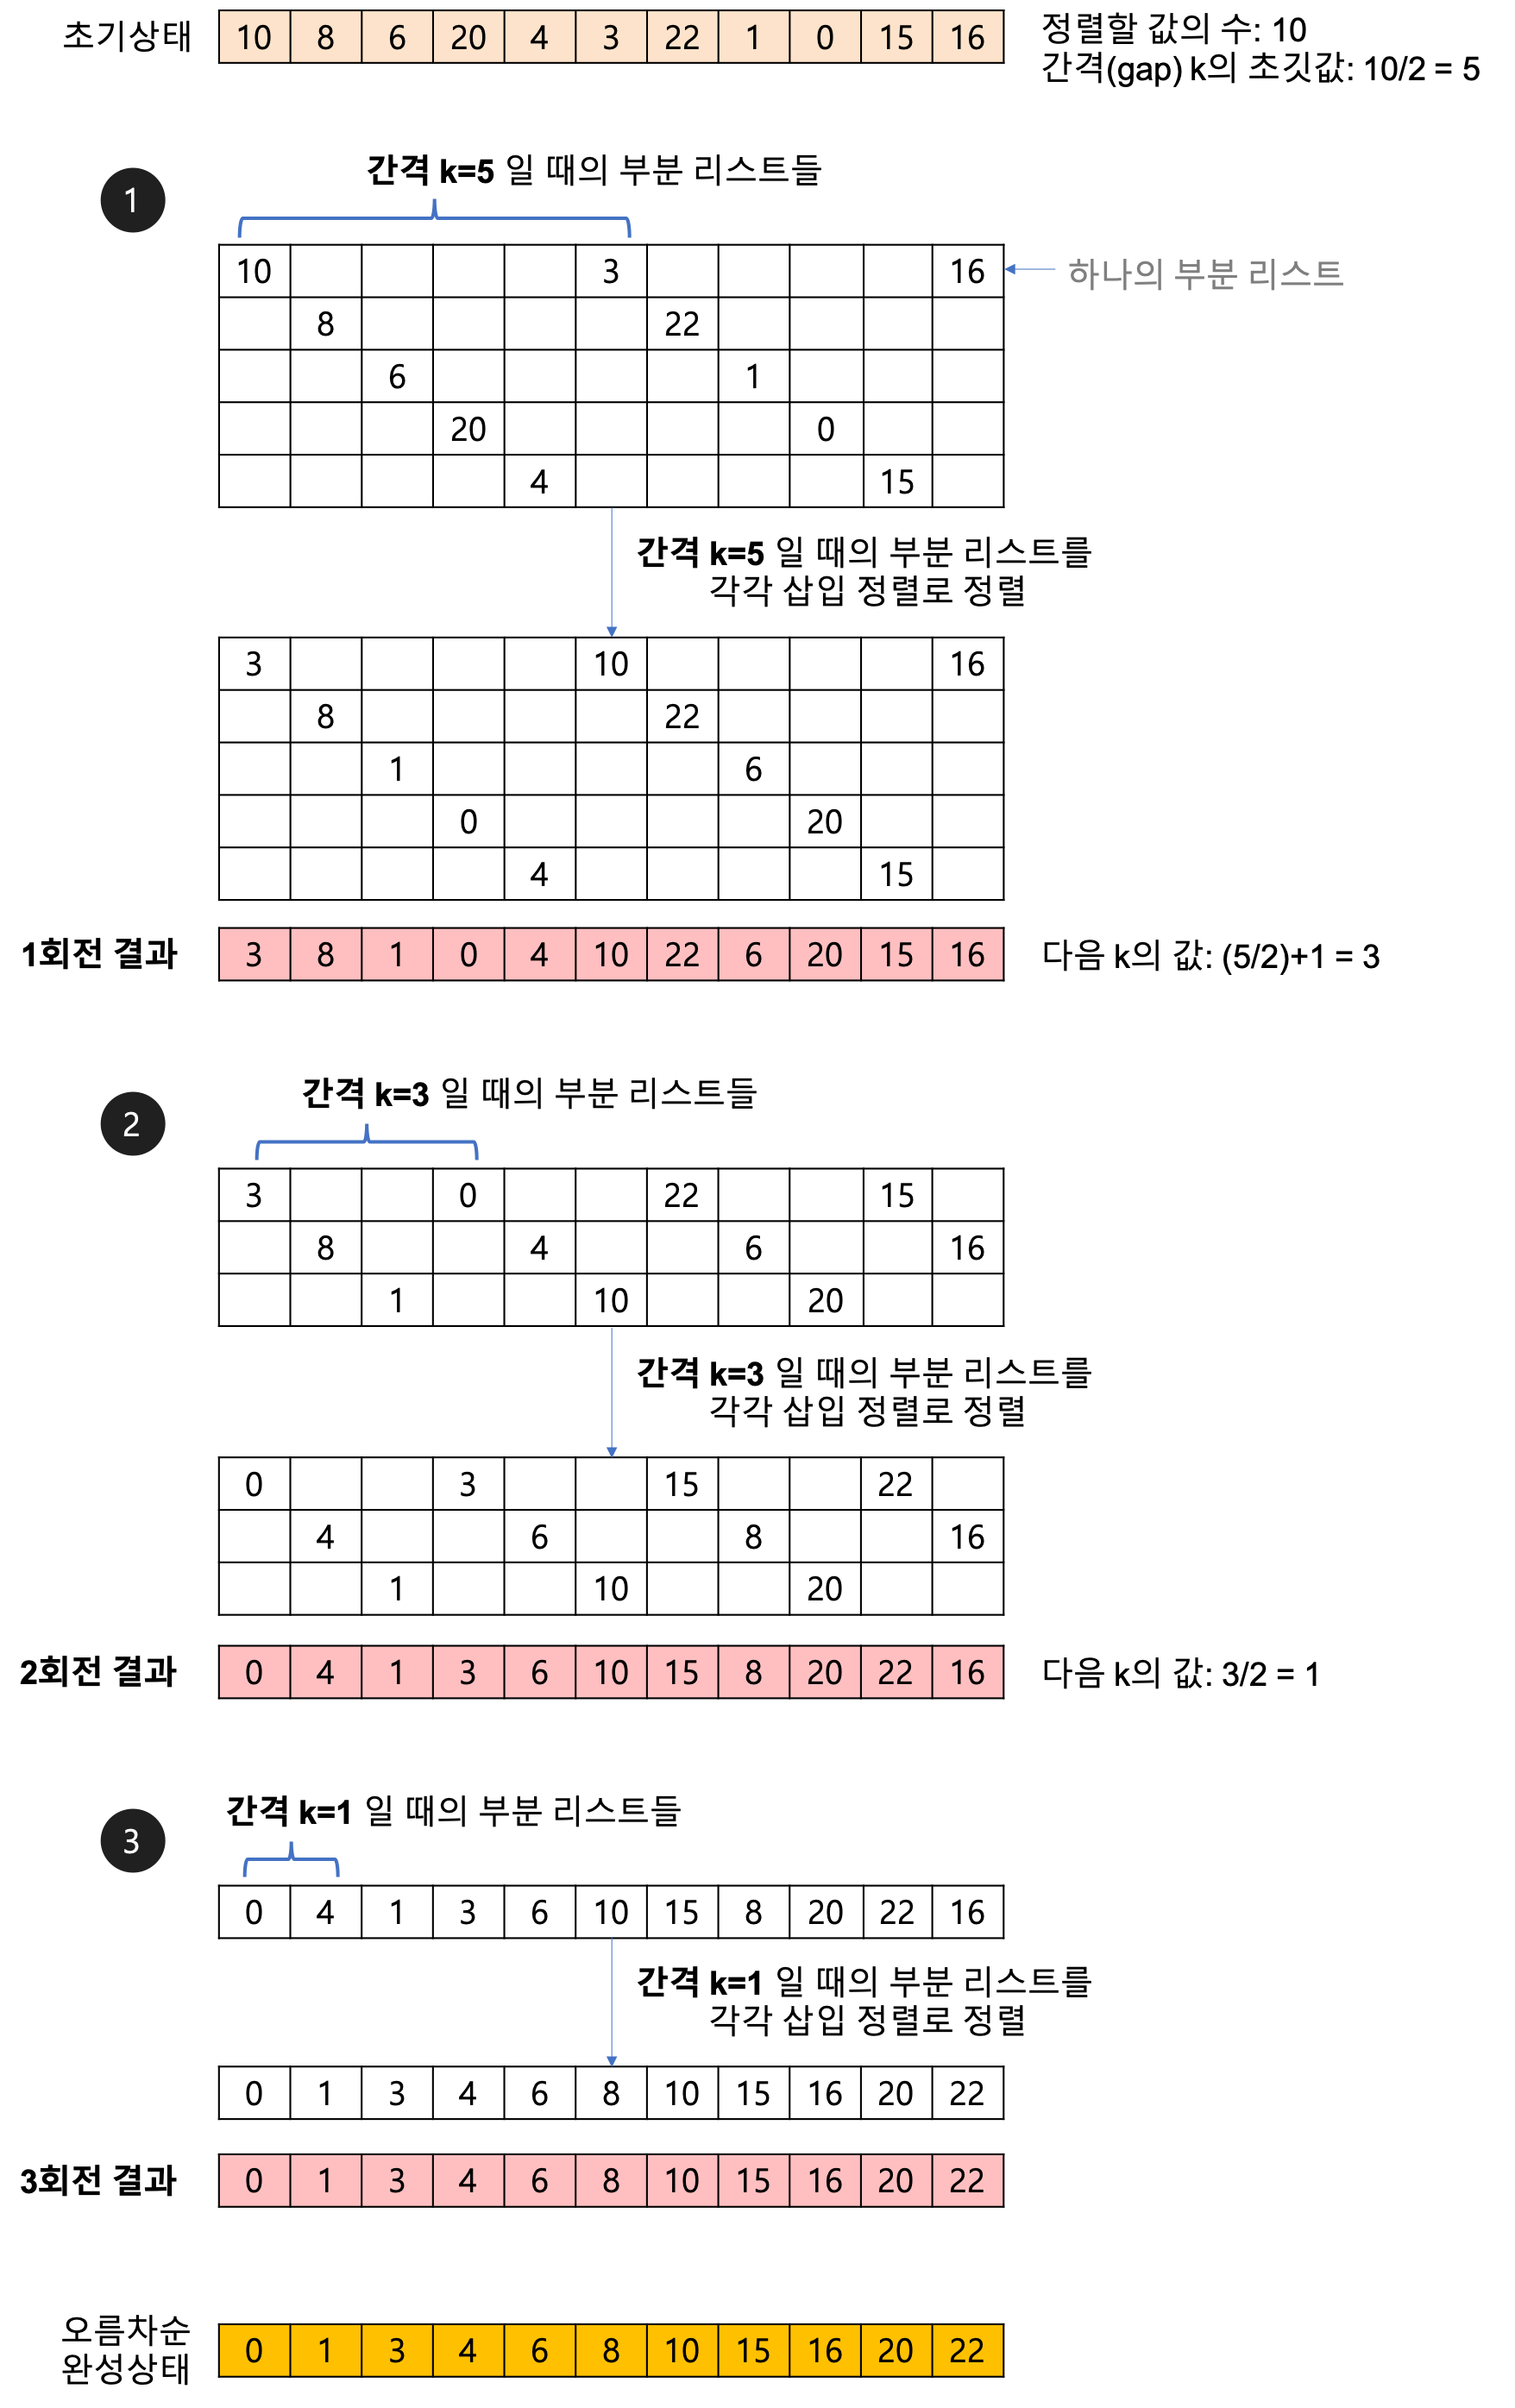

## 위상 정렬(방향그래프와 관련)
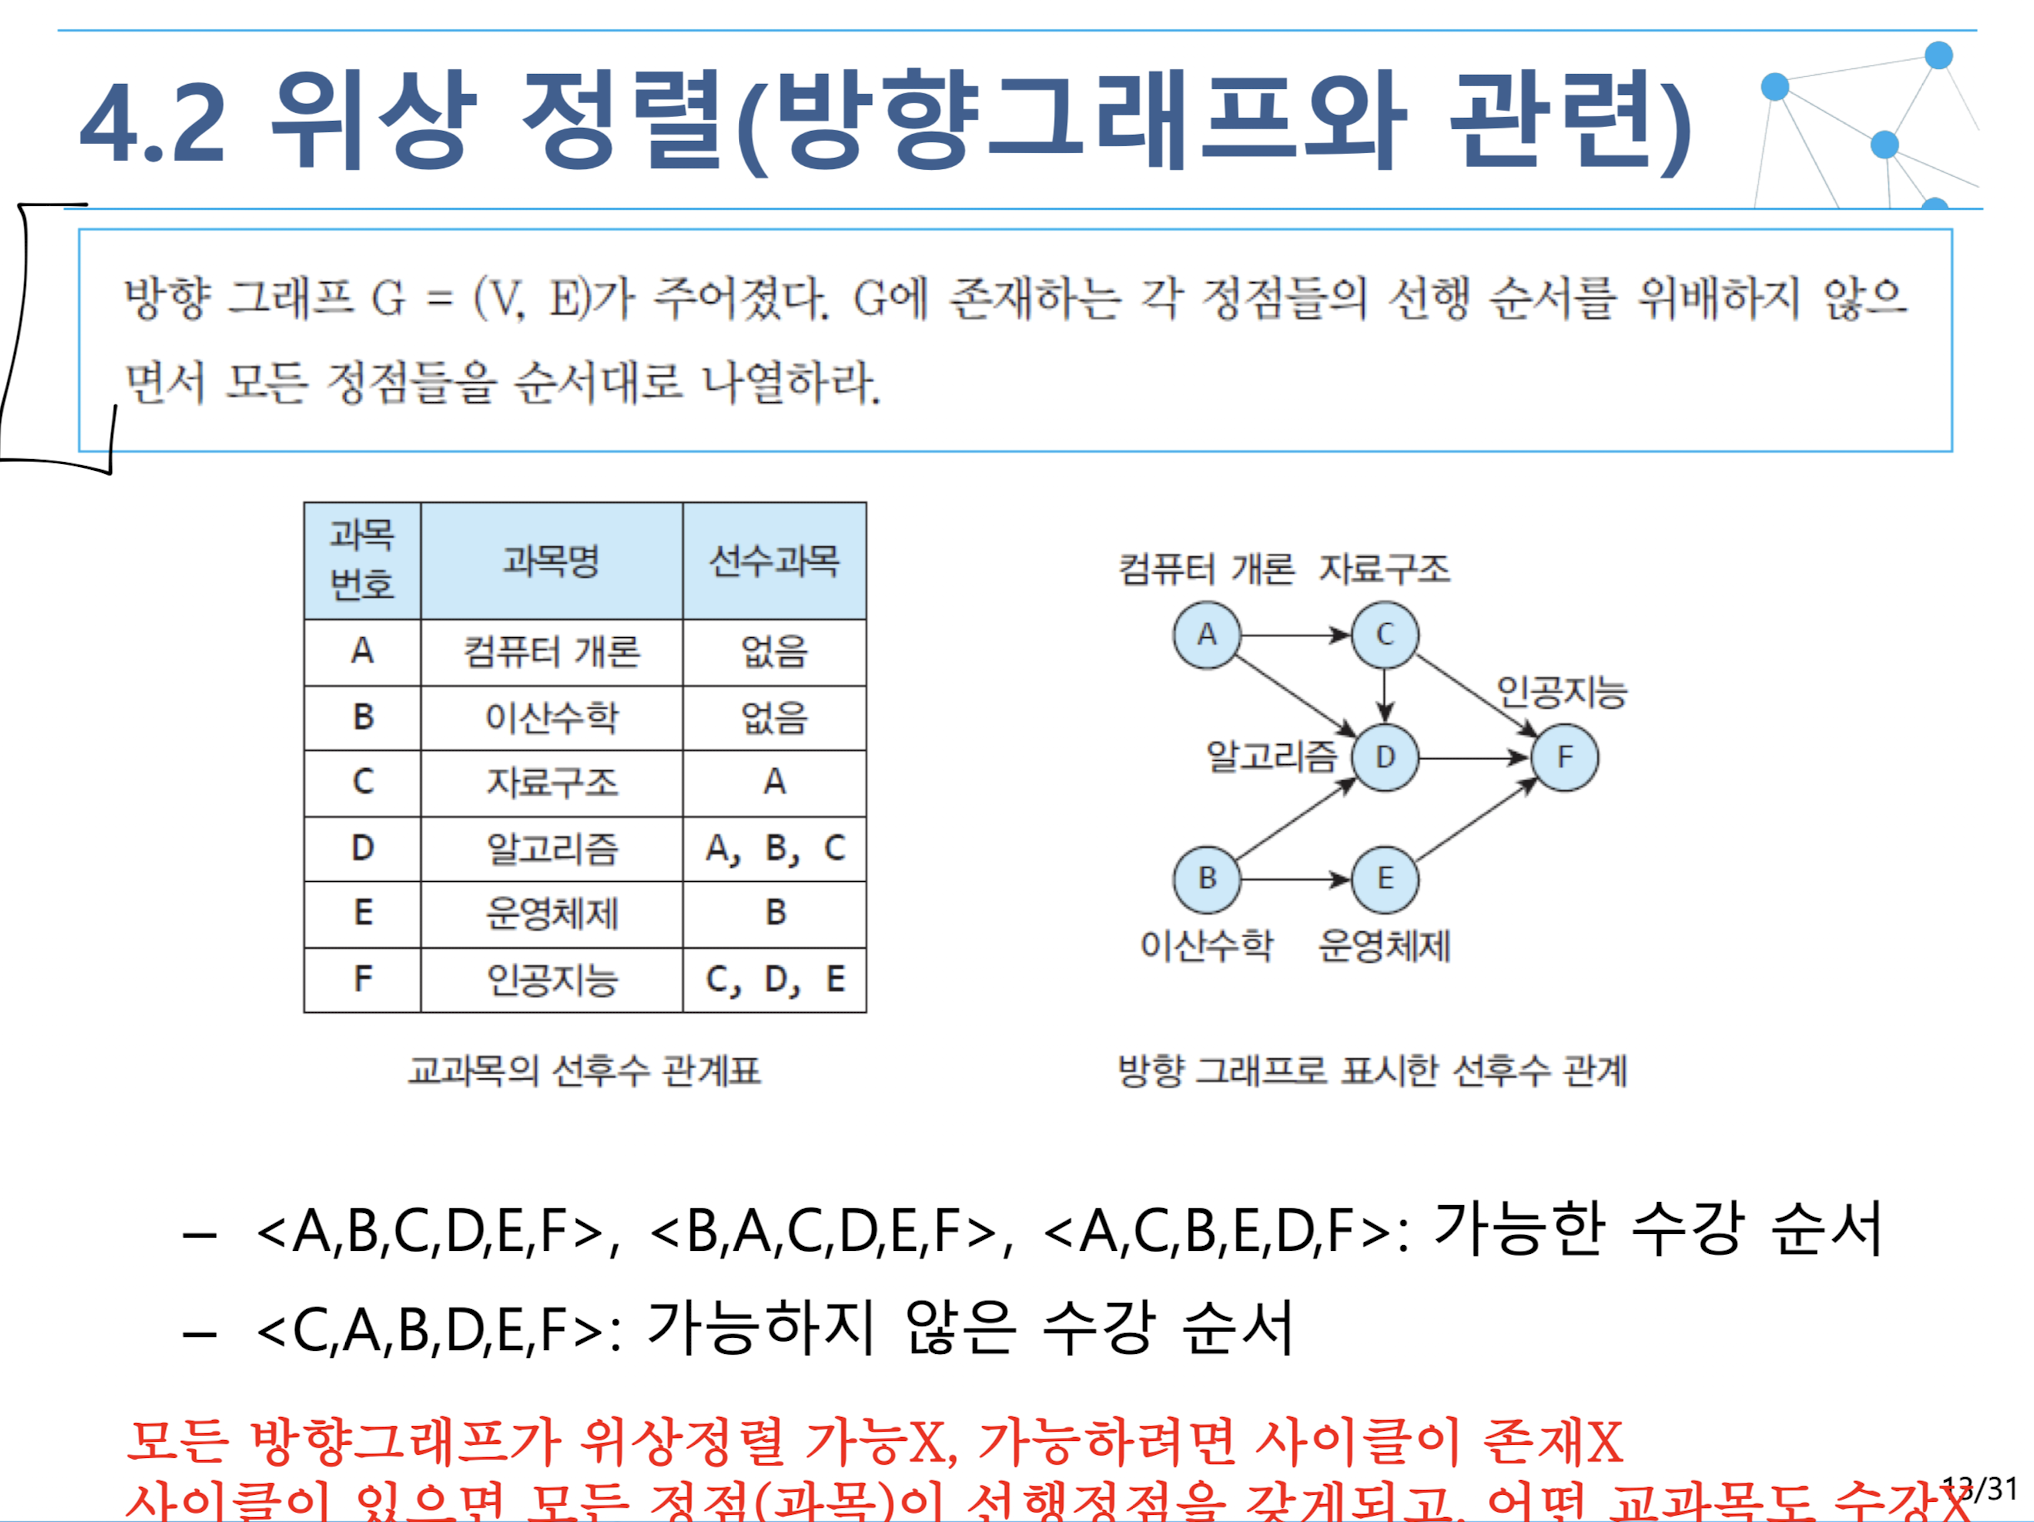

### DFS 기반 알고리즘(억지기법)
진입차수가 0인 임의의 정점을 시작 정점으로 선택  
길이 우선 탐색으로 그래프의 정점들을 방문  
더 이상 갈 수 있는 정점이 없으면 다른 집입 차가 0인 정점으로
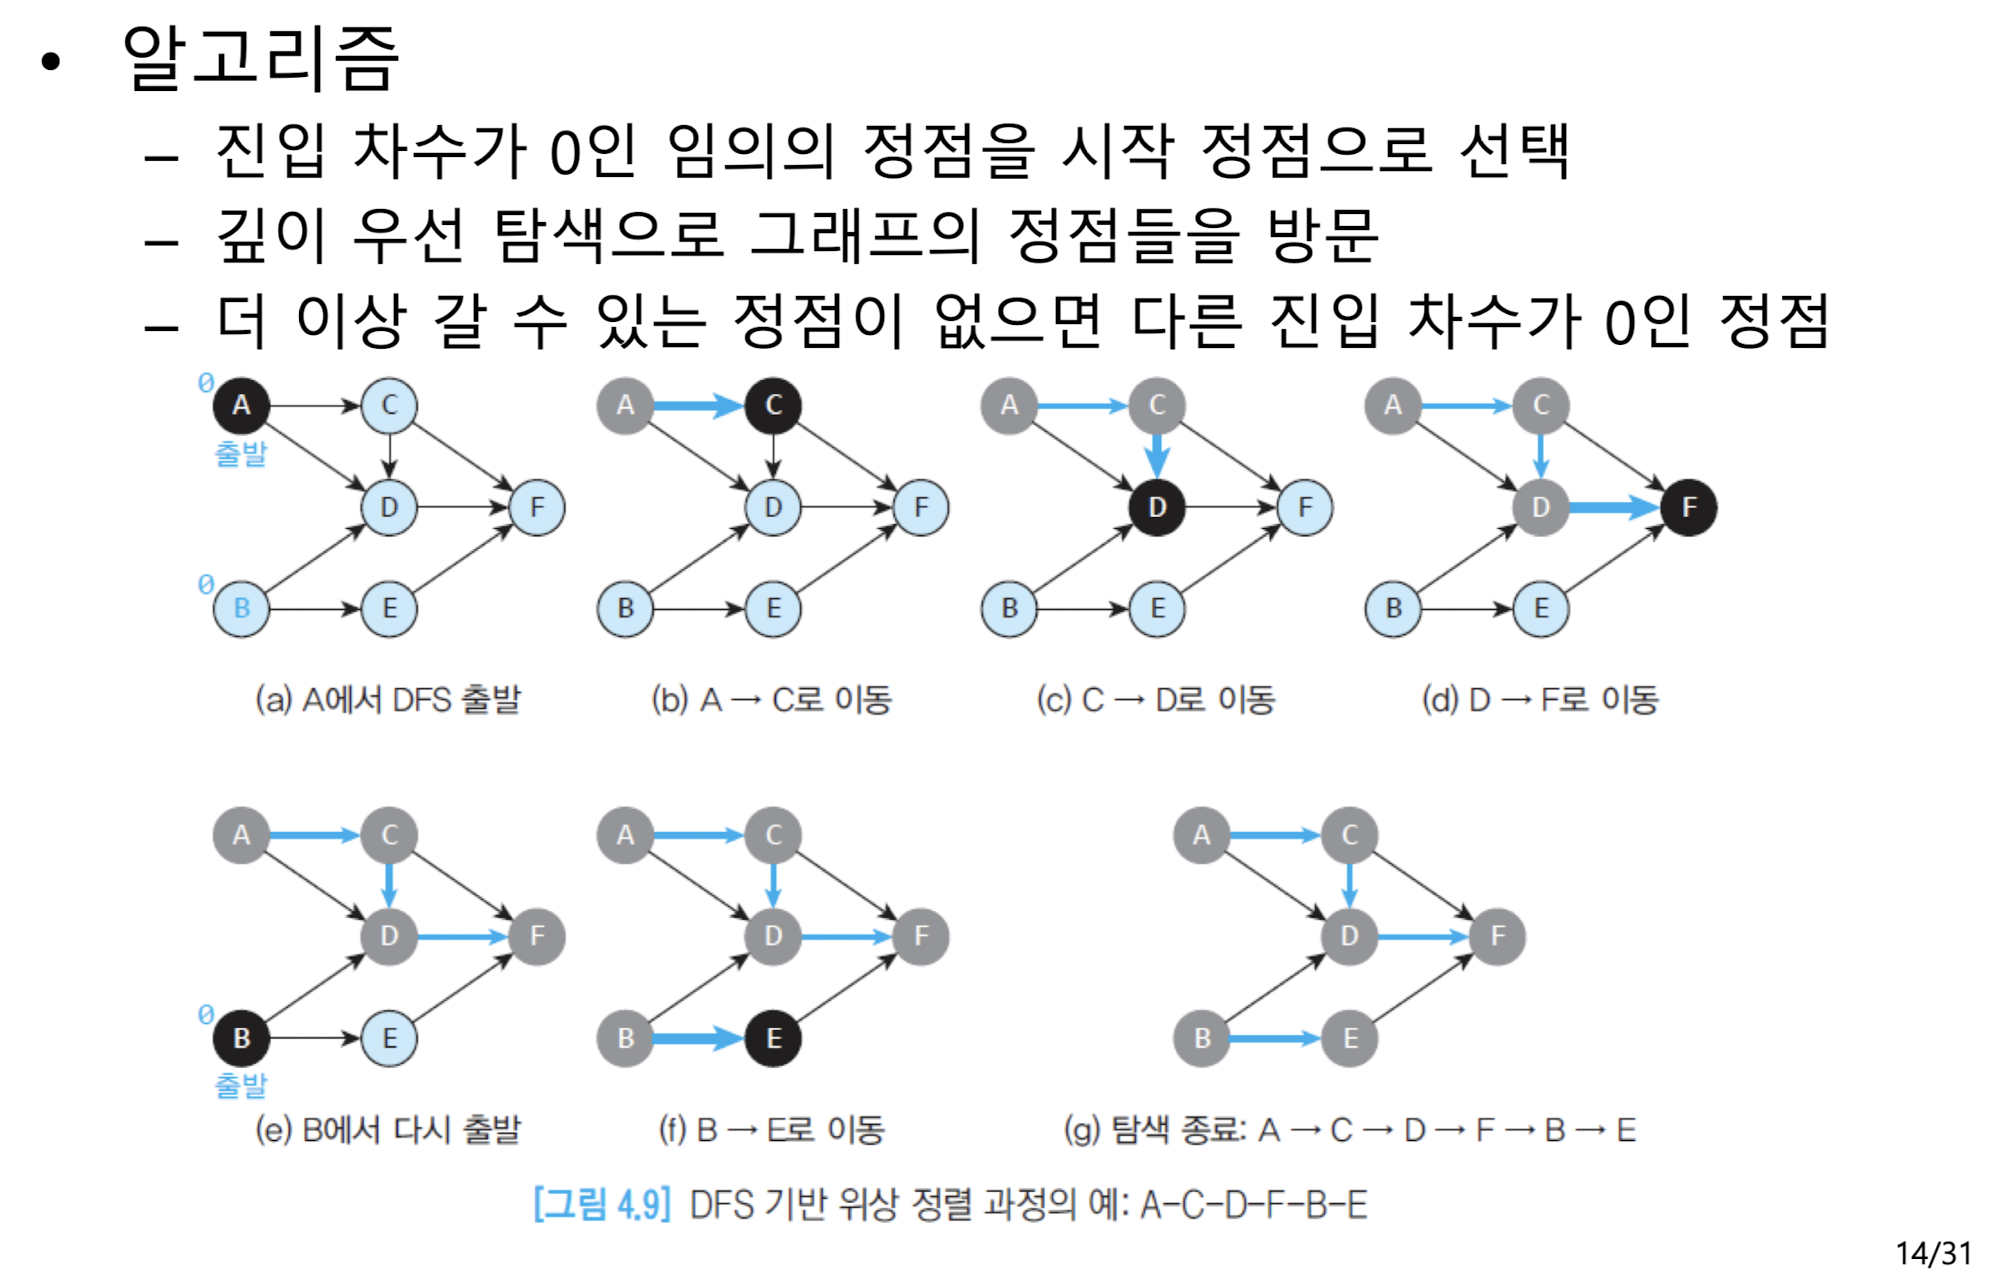


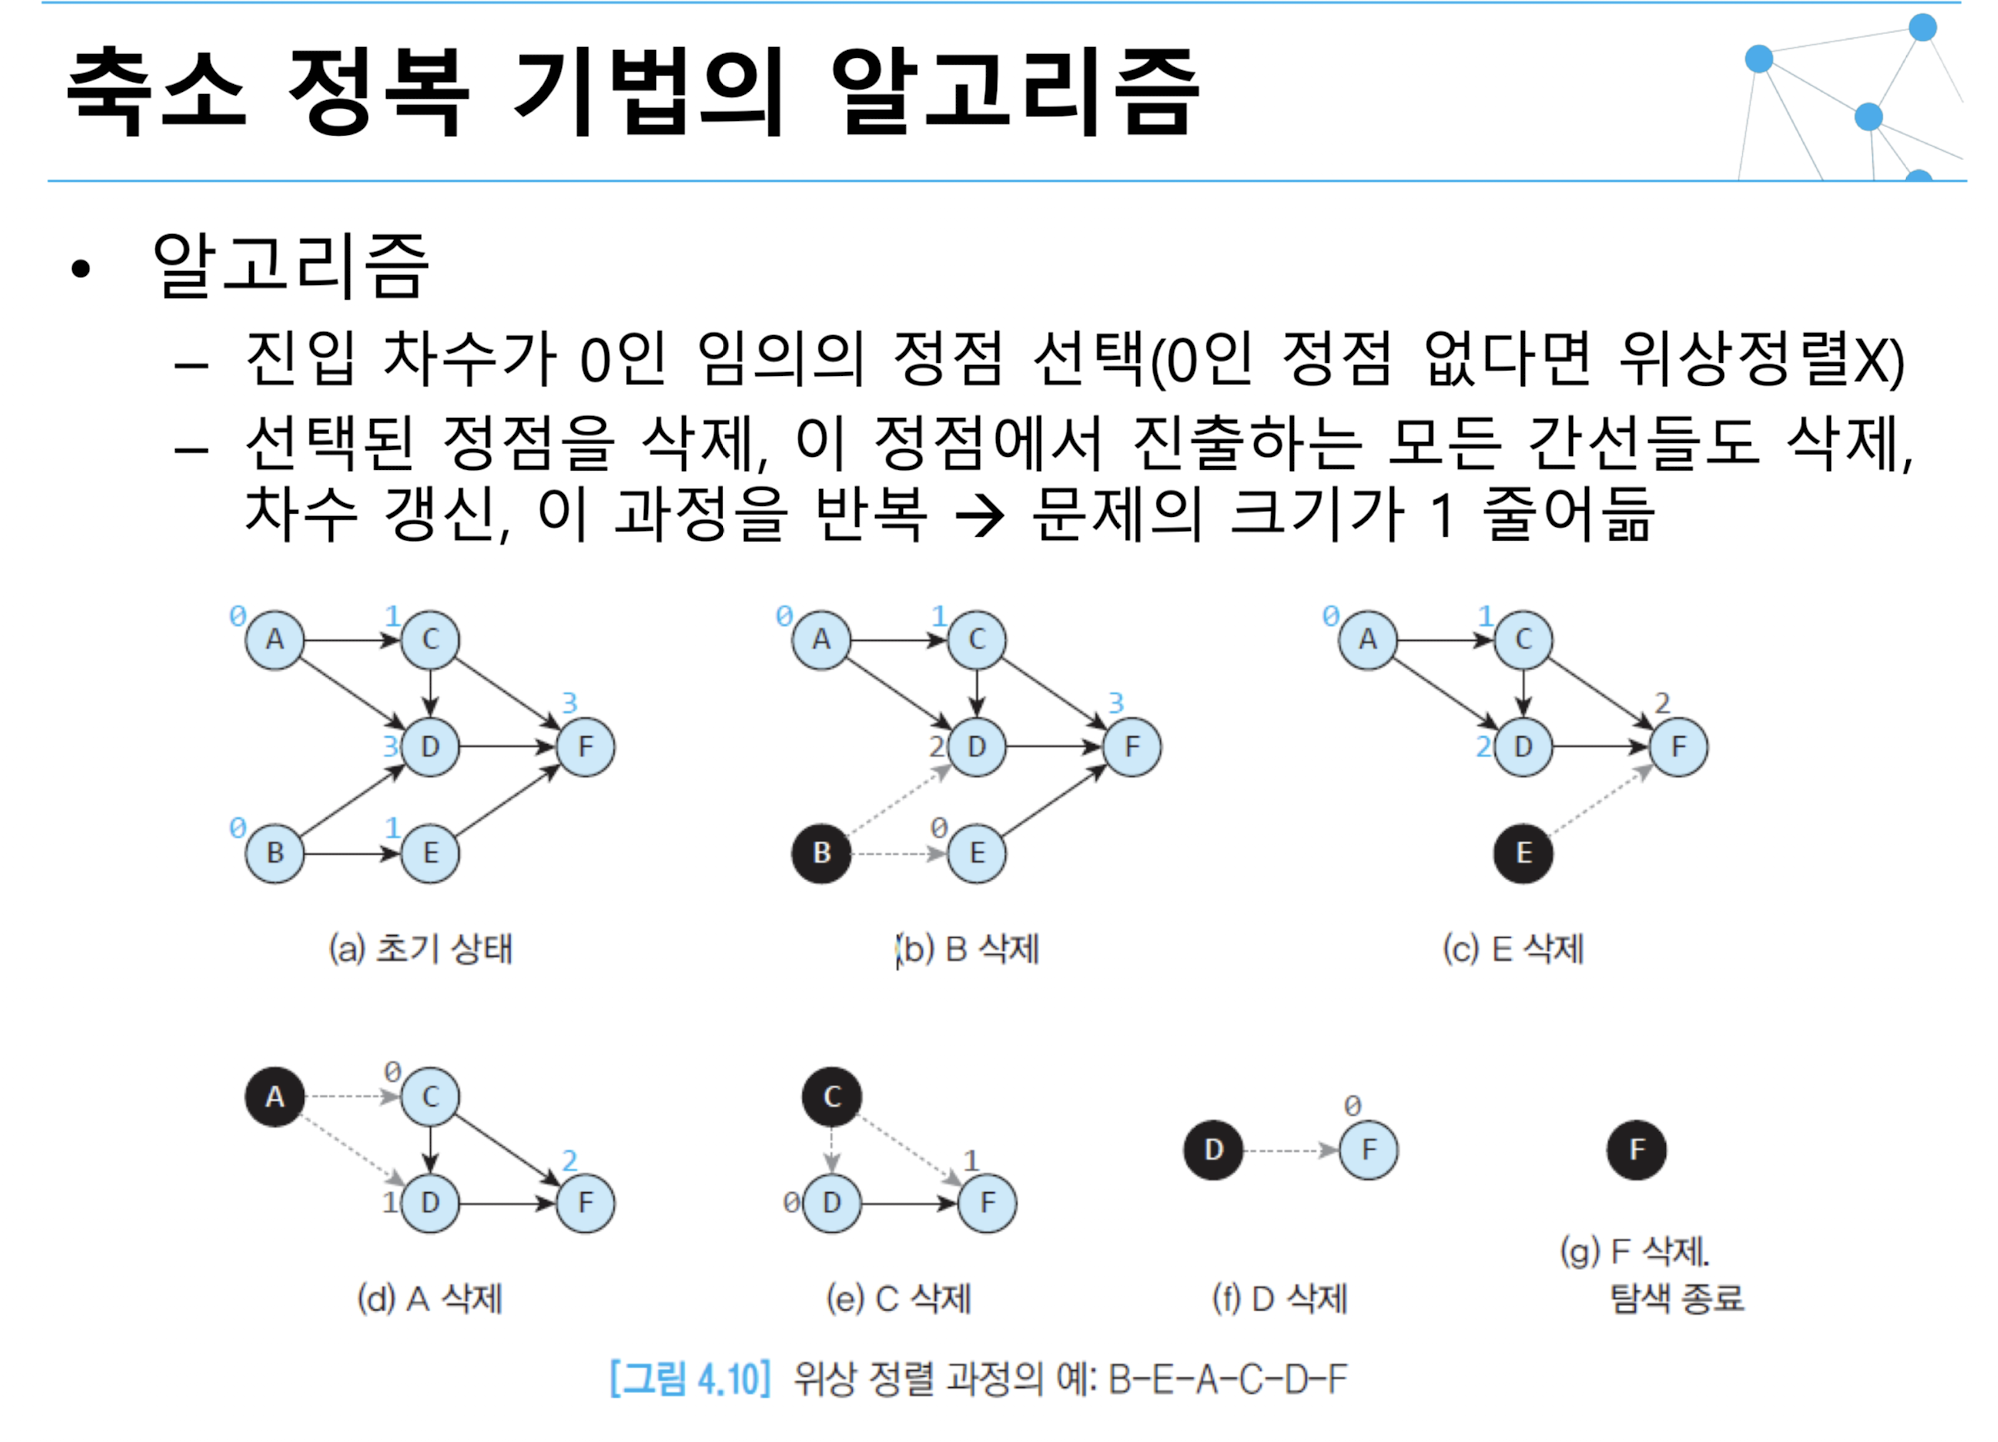

In [1]:
def topological_sort(graph) :

    inDeg = {}                  # { 정점:진입차수 } 저장을 위한 공백 딕셔너리

    for v in graph :           # 그래프의 모든 정점에 대해

        inDeg[v] = 0           # 0으로 초기화. inDeg = { "A":0, "B":0, ... }

    for v in graph :           # 모든 정점 v 에 대해

        for u in graph[v]:     # v에 인접한 모든 정점 u에 대해

            inDeg[u] += 1      # 진입차수를 1 증가시킴

 

    vlist = []                 # 진입차수가 0인 정점 리스트를 만듦

    for v in graph :

        if inDeg[v]==0 :      # 진입차수가 0이면 vlist에 추가

            vlist.append(v)

    while vlist :             # 리스트가 공백이 아닐 때 까지

        v = vlist.pop()       # 진입차수가 0인 정점을 하나 꺼냄

        print(v, end=' ')      # 화면 출력

        for u in graph[v] :      # 연결된 정점의 진입차수 감소

            inDeg[u] -= 1      # 진입차수 감소

            if inDeg[u]==0 :    # 진입차수가 0이면 vlist에 추가

                vlist.append(u)
"""

A     0   0   1   1   0   0

B     0   0   0   1   1   0

C     0   0   0   1   0   1

D     0   0   0   0   0   1

E     0   0   0   0   0   1

F     0   0   0   0   0   0

"""

mygraph = { "A" : {"C", "D"},

            "B" : {"D", "E"},

            "C" : {"D", "F"},

            "D" : {"F"},

            "E" : {"F"},

            "F" : set()

          }

 

print('topological_sort: ')

topological_sort(mygraph)

print()

topological_sort: 
B E A C D F 


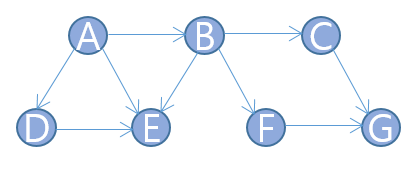

In [5]:
#위에 사진에 댜한 코드
def topological_sort(graph) :

    inDeg = {}                  # { 정점:진입차수 } 저장을 위한 공백 딕셔너리

    for v in graph :           # 그래프의 모든 정점에 대해

        inDeg[v] = 0           # 0으로 초기화. inDeg = { "A":0, "B":0, ... }

    for v in graph :           # 모든 정점 v 에 대해

        for u in graph[v]:     # v에 인접한 모든 정점 u에 대해

            inDeg[u] += 1      # 진입차수를 1 증가시킴

 

    vlist = []                 # 진입차수가 0인 정점 리스트를 만듦

    for v in graph :

        if inDeg[v]==0 :      # 진입차수가 0이면 vlist에 추가

            vlist.append(v)

    while vlist :             # 리스트가 공백이 아닐 때 까지

        v = vlist.pop()       # 진입차수가 0인 정점을 하나 꺼냄

        print(v, end=' ')      # 화면 출력

        for u in graph[v] :      # 연결된 정점의 진입차수 감소

            inDeg[u] -= 1      # 진입차수 감소

            if inDeg[u]==0 :    # 진입차수가 0이면 vlist에 추가
 
                vlist.append(u)
                
mygraph = { "A" : {"B", "D","E"},

            "B" : {"C", "E","F"},

            "C" : {"G"},

            "D" : {"E"},

            "E" : set(),

            "F" : {"G"},
           
            "G" : set()

          }

 

print('topological_sort: ')

topological_sort(mygraph)
##AB
print()




topological_sort: 
A D B F E C G 
